In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<h2> Оглавление </h2>
<ul>  <li> <h3> Обучение без учителя </h3>
     <ul>  <li> <a href = "#task001"> Задание1</a></li>
           <li> <a href = "#task002"> Задание2</a></li>
           <li> <a href = "#task003"> Задание3</a></li>
      </ul>
     </li>
     
</ul>

<h3 id = "task001"> Задание1</h3>
<p> ИИмпортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn. <br>
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.<br>
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

</p>

In [3]:
from sklearn.datasets import load_boston
boston_ds = load_boston()
boston_ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(data = boston_ds['data'], columns = boston_ds['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
y = pd.Series(data = boston_ds['target'])
y.iloc[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [8]:
# Нормализация данных
from sklearn.preprocessing import StandardScaler


std_scaler = StandardScaler()
X_ntrain = std_scaler.fit_transform(X_train)
print(round(X_ntrain.mean(), 4)) # проверка кооректност работы скалера 0 - среднее, 1 - стандартное отклонение по всем столбцам
print(round(X_ntrain.std(), 4))

0.0
1.0


In [9]:
from sklearn.manifold import TSNE

t_sne = TSNE(n_components= 2,
             learning_rate= 250,
             random_state= 42)

In [10]:
tx_train = t_sne.fit_transform(X_ntrain) # трасформируем тренировочные данные 

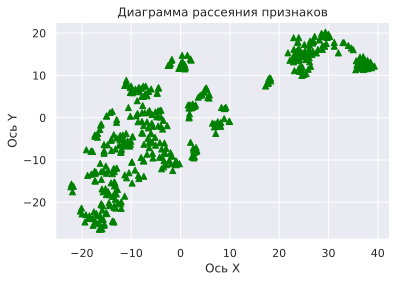

In [11]:
# визуализируем результат понижения размерности, теперь все признаки приведены к 2-мерному пространству

plt.title("Диаграмма рассеяния признаков")
plt.scatter(tx_train[:,0], tx_train[:,1], c = 'green', marker = '^')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.show()

In [12]:
# Действительно виды два линейно-разделимиых кластера с границей по оси X~15

<h3 id = "task002"> Задание2</h3>
<p> С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.
</p>

In [13]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3, 
                 max_iter = 100,
                 random_state = 42)

In [14]:
k_means.fit(tx_train)
y_labels = k_means.labels_

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


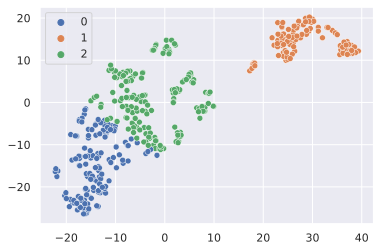

In [15]:
sns.scatterplot(tx_train[:,0], tx_train[:,1], hue= y_labels, 
                 palette= 'deep') # назначим контрастные цвета 

In [16]:
price_crim = pd.DataFrame(data = {'CRIM': X_train.CRIM,   # датафрейм  для расчета характеристик кластеров
                                  'price': y_train.values,
                                  'Cluster': y_labels}, index = X_train.index)

In [17]:
price_crim.head(5)

,CRIM,price,Cluster
477,15.02340,12.0,1
15,0.62739,19.9,2
332,0.03466,19.4,0
423,7.05042,13.4,1
19,0.72580,18.2,2


In [18]:
price_crim.groupby(by='Cluster').mean() # группируем по меткам кластеров, и вычисляем средние значения

,CRIM,price
Cluster,,
0,0.094623,26.564706
1,13.179822,16.277228
2,0.682968,23.670659


In [19]:
# По показателю "CRIM" разделение на 3 кластера выглядит обоснованным
# По показателю "price"  получились близкие средние значения в 0 и 2 кластере (графически раззличия в кластерах видны 
# по цене надо оценивать доверительные интервалы)

<h3 id = "task003"> Задание3</h3>
<p> Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
</p>

In [20]:
print(X_test.shape)
print(y_test.shape)

(102, 13)
(102,)


In [21]:
# Выполним аналогичный расчет для тестового набора

#Нормализация признаков
X_ntest = std_scaler.transform(X_test)

In [22]:
# понижение размерности для признаков
tx_test = t_sne.fit_transform(X_ntest)

In [23]:
# Кластеризация
y_test_labels = k_means.predict(tx_test)
print(y_test_labels.shape)

(102,)


/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


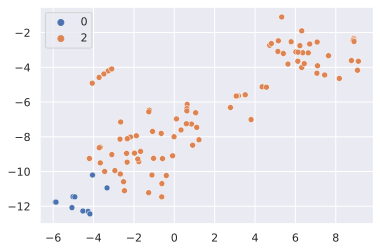

In [24]:
sns.scatterplot(tx_test[:,0], tx_test[:,1], hue = y_test_labels, palette= 'deep')

In [25]:
# В тестовой выборке данных из  кластера № 1  не оказалось
test_price_crim = pd.DataFrame({'CRIM': X_test.CRIM,
                                'price': y_test.values,
                                'Cluster': y_test_labels}, index = X_test.index)
test_price_crim.head(5)

,CRIM,price,Cluster
173,0.09178,23.6,2
274,0.05644,32.4,2
491,0.10574,13.6,2
72,0.09164,22.8,2
452,5.09017,16.1,2


In [26]:
test_price_crim.groupby(by ='Cluster').mean()

,CRIM,price
Cluster,,
0,0.052055,32.990909
2,4.063560,20.097802
